This notebook shows how AI4Water can read data f rom different file formats.
If the data is arranged properly in a tabular format, then AI4Water can read data from one of the following file formats:

| file extension | file type |
|----------------|-----------|
| .csv | comma separated file |
| .xlsx | microsoft excel |
| .parquet | parquet|
| .feather | feather|
| .nc | netcdf5|
| .mat | matlab file|
| .npz | numpy compressed file|


We will first save the data in the above mentioned file formats and then show how AI4Water can read data from those files.

In [1]:
try:
    import AI4Water
except ImportError:
    !python -m pip install "AI4Water[all] @ git+https://github.com/AtrCheema/AI4Water.git"


In [2]:
import os
import scipy
import numpy as np

from ai4water import Model
from ai4water.datasets import MtropicsLaos

In [3]:
laos = MtropicsLaos()

data = laos.make_regression()


Not downloading the data since the directory 
D:\mytools\AI4Water\ai4water\datasets\data\MtropicsLaos already exists.
Use overwrite=True to remove previously saved files and download again


D:\mytools\AI4Water\ai4water\datasets\datasets.py:1340: UserWarning: preprocessing of shapefiles can not be done because no fiona installation is found.
  warnings.warn("preprocessing of shapefiles can not be done because no fiona installation is found.")
D:\mytools\AI4Water\ai4water\datasets\datasets.py:1151: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return wl.loc[st:en], spm.loc[st:en]


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.shape

(650741, 8)

In [6]:
data.head()

,temp,rel_hum,wind_speed,sol_rad,water_level,pcp,susp_pm,Ecoli_mpn100
2011-05-25 14:00:00,22.9,100.0,7.0,256.0,133.0,0.0,0.9,NaN
2011-05-25 14:06:00,22.9,100.0,6.7,246.2,133.0,0.0,0.9,NaN
2011-05-25 14:12:00,22.9,100.0,6.4,236.4,133.0,0.0,0.9,NaN
2011-05-25 14:18:00,22.9,100.0,6.1,226.6,133.0,0.0,0.9,NaN
2011-05-25 14:24:00,22.9,100.0,5.8,216.8,133.0,0.0,0.9,NaN


In [7]:
data.tail()

,temp,rel_hum,wind_speed,sol_rad,water_level,pcp,susp_pm,Ecoli_mpn100
2018-10-26 23:36:00,21.72,100.0,0.0012,0.0,147.3,0.0,1.3,NaN
2018-10-26 23:42:00,21.64,100.0,0.0009,0.0,146.9,0.0,1.3,NaN
2018-10-26 23:48:00,21.56,100.0,0.0006,0.0,146.9,0.0,1.3,NaN
2018-10-26 23:54:00,21.48,100.0,0.0003,0.0,146.9,0.0,1.3,NaN
2018-10-27 00:00:00,21.40,100.0,0.0000,0.0,146.9,0.0,1.3,NaN


First use the above DataFrame as input to Model

In [8]:
model = Model(model="RandomForestRegressor",
             data=data)

building ML model for  regression problem using RandomForestRegressor


In [9]:
train_x, train_y = model.training_data()
print(train_x.shape, train_y.shape)


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (165, 7)
target shape:  (165, 1, 1)
(165, 7) (165, 1, 1)


In [10]:
val_x, val_y = model.validation_data()
print(val_x.shape, val_y.shape)


********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (41, 7)
target shape:  (41, 1, 1)
(41, 7) (41, 1, 1)


In [11]:
test_x, test_y = model.test_data()
print(test_x.shape, test_y.shape)


********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (52, 7)
target shape:  (52, 1, 1)
(52, 7) (52, 1, 1)


Now saving the data into different file formats

In [12]:
csv_fname = os.path.join(os.getcwd(), "data.csv")
data.to_csv(csv_fname)

xlsx_fname = os.path.join(os.getcwd(), "data.xlsx")
data.to_excel(xlsx_fname, engine="xlsxwriter")

parq_fname = os.path.join(os.getcwd(), "data.parquet")
data.to_parquet(parq_fname)

feather_fname = os.path.join(os.getcwd(), "data.feather")
data.reset_index().to_feather(feather_fname)

nc_fname = os.path.join(os.getcwd(), "data.nc")
xds = data.to_xarray()
xds.to_netcdf(nc_fname)

npz_fname = os.path.join(os.getcwd(), "data.npz")
np.savez(npz_fname, data.values)

mat_fname = os.path.join(os.getcwd(), "data.mat")
scipy.io.savemat(mat_fname, {'data': data.values})

# csv file

In [13]:
model = Model(model="RandomForestRegressor",
             data=csv_fname,
              input_features=['temp', 'rel_hum', 'wind_speed', 'sol_rad',
                              'water_level', 'pcp', 'susp_pm'],
              output_features=['Ecoli_mpn100'])

train_x, train_y = model.training_data()
print(train_x.shape, train_y.shape)

building ML model for  regression problem using RandomForestRegressor

********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (165, 7)
target shape:  (165, 1, 1)
(165, 7) (165, 1, 1)


In [14]:
val_x, val_y = model.validation_data()
print(val_x.shape, val_y.shape)


********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (41, 7)
target shape:  (41, 1, 1)
(41, 7) (41, 1, 1)


In [15]:
test_x, test_y = model.test_data()
print(test_x.shape, test_y.shape)


********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (52, 7)
target shape:  (52, 1, 1)
(52, 7) (52, 1, 1)


# xlsx file

In [16]:
model = Model(model="RandomForestRegressor",
             data=xlsx_fname,
              input_features=['temp', 'rel_hum', 'wind_speed', 'sol_rad',
                              'water_level', 'pcp', 'susp_pm'],
              output_features=['Ecoli_mpn100'])

train_x, train_y = model.training_data()
print(train_x.shape, train_y.shape)

building ML model for  regression problem using RandomForestRegressor

********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (165, 7)
target shape:  (165, 1, 1)
(165, 7) (165, 1, 1)


In [17]:
val_x, val_y = model.validation_data()
print(val_x.shape, val_y.shape)


********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (41, 7)
target shape:  (41, 1, 1)
(41, 7) (41, 1, 1)


In [18]:
test_x, test_y = model.test_data()
print(test_x.shape, test_y.shape)


********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (52, 7)
target shape:  (52, 1, 1)
(52, 7) (52, 1, 1)


# parquet file

In [20]:
model = Model(model="RandomForestRegressor",
             data=parq_fname,
              input_features=['temp', 'rel_hum', 'wind_speed', 'sol_rad',
                              'water_level', 'pcp', 'susp_pm'],
              output_features=['Ecoli_mpn100'])

train_x, train_y = model.training_data()
print(train_x.shape, train_y.shape)

building ML model for  regression problem using RandomForestRegressor

********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (165, 7)
target shape:  (165, 1, 1)
(165, 7) (165, 1, 1)


In [22]:
val_x, val_y = model.validation_data()
print(val_x.shape, val_y.shape)


********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (41, 7)
target shape:  (41, 1, 1)
(41, 7) (41, 1, 1)


In [25]:
test_x, test_y = model.test_data()
print(test_x.shape, test_y.shape)


********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (52, 7)
target shape:  (52, 1, 1)
(52, 7) (52, 1, 1)


# feather file

In [26]:
model = Model(model="RandomForestRegressor",
             data=feather_fname,
              input_features=['temp', 'rel_hum', 'wind_speed', 'sol_rad',
                              'water_level', 'pcp', 'susp_pm'],
              output_features=['Ecoli_mpn100'])

train_x, train_y = model.training_data()
print(train_x.shape, train_y.shape)

building ML model for  regression problem using RandomForestRegressor

********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (165, 7)
target shape:  (165, 1, 1)
(165, 7) (165, 1, 1)


In [27]:
val_x, val_y = model.validation_data()
print(val_x.shape, val_y.shape)


********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (41, 7)
target shape:  (41, 1, 1)
(41, 7) (41, 1, 1)


In [28]:
test_x, test_y = model.test_data()
print(test_x.shape, test_y.shape)


********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (52, 7)
target shape:  (52, 1, 1)
(52, 7) (52, 1, 1)


# netcdf file

In [30]:
model = Model(model="RandomForestRegressor",
             data=nc_fname,
              input_features=['temp', 'rel_hum', 'wind_speed', 'sol_rad',
                              'water_level', 'pcp', 'susp_pm'],
              output_features=['Ecoli_mpn100'])

train_x, train_y = model.training_data()
print(train_x.shape, train_y.shape)

building ML model for  regression problem using RandomForestRegressor

********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (165, 7)
target shape:  (165, 1, 1)
(165, 7) (165, 1, 1)


In [31]:
val_x, val_y = model.validation_data()
print(val_x.shape, val_y.shape)


********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (41, 7)
target shape:  (41, 1, 1)
(41, 7) (41, 1, 1)


In [32]:
test_x, test_y = model.test_data()
print(test_x.shape, test_y.shape)


********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (52, 7)
target shape:  (52, 1, 1)
(52, 7) (52, 1, 1)


# npz file

In [33]:
model = Model(model="RandomForestRegressor",
             data=npz_fname,
              input_features=['temp', 'rel_hum', 'wind_speed', 'sol_rad',
                              'water_level', 'pcp', 'susp_pm'],
              output_features=['Ecoli_mpn100'])

train_x, train_y = model.training_data()
print(train_x.shape, train_y.shape)

building ML model for  regression problem using RandomForestRegressor

********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (165, 7)
target shape:  (165, 1, 1)
(165, 7) (165, 1, 1)


In [34]:
val_x, val_y = model.validation_data()
print(val_x.shape, val_y.shape)


********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (41, 7)
target shape:  (41, 1, 1)
(41, 7) (41, 1, 1)


In [35]:
test_x, test_y = model.test_data()
print(test_x.shape, test_y.shape)


********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (52, 7)
target shape:  (52, 1, 1)
(52, 7) (52, 1, 1)


# mat file

In [36]:
model = Model(model="RandomForestRegressor",
              data=mat_fname,
              input_features=['temp', 'rel_hum', 'wind_speed', 'sol_rad',
                              'water_level', 'pcp', 'susp_pm'],
              output_features=['Ecoli_mpn100'])

train_x, train_y = model.training_data()
print(train_x.shape, train_y.shape)

building ML model for  regression problem using RandomForestRegressor

********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (165, 7)
target shape:  (165, 1, 1)
(165, 7) (165, 1, 1)


In [37]:
val_x, val_y = model.validation_data()
print(val_x.shape, val_y.shape)


********** Removing Examples with nan in labels  **********

***** Validation *****
input_x shape:  (41, 7)
target shape:  (41, 1, 1)
(41, 7) (41, 1, 1)


In [38]:
test_x, test_y = model.test_data()
print(test_x.shape, test_y.shape)


********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (52, 7)
target shape:  (52, 1, 1)
(52, 7) (52, 1, 1)


the model can be trained and used for prediction and internally the Model class will take care of feeding the right data to the machine learning model.

In [39]:
model.fit()


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (165, 7)
target shape:  (165, 1, 1)


RandomForestRegressor()


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (165, 7)
target shape:  (165, 1, 1)


D:\mytools\AI4Water\ai4water\post_processing\SeqMetrics\_regression.py:648: RuntimeWarning: divide by zero encountered in true_divide
  return float(np.mean(np.abs((self.true - self.predicted) / self.true)) * 100)
d:\c\anaconda3\envs\tfcpu115_py37\lib\site-packages\scipy\stats\stats.py:410: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


array([ 1446.75,  4877.  , 12462.1 ,  5950.  , 17691.4 ,  5215.  ,
        2467.1 ,  3422.3 ,  2510.  ,  6394.4 ,   355.8 ,  2702.8 ,
        7143.4 ,  2454.7 ,   591.2 ,   738.1 ,   366.42,   100.05,
         254.94,   705.14,   104.72,   349.26,   551.04,   316.22,
         822.3 ,   491.9 ,   538.96,   262.88,   765.04,  2571.56,
        5849.92, 25475.4 , 36531.  , 17332.7 ,  6393.2 ,   802.3 ,
         479.96,  3482.24,  1851.36,  5466.69,  4017.32,  4140.74,
        2394.74,  2383.1 ,  4092.92,  8176.88, 12796.92, 24415.3 ,
        9237.32,  5698.9 ,  3376.84,  2745.5 ,  2505.9 ,  1840.82,
         655.98,   537.5 ,  1359.4 ,  1799.6 ,   582.3 ,  1760.5 ,
        2257.6 ,   585.68,   470.3 ,   831.5 ,   335.28,  1690.3 ,
         184.44,   179.66,   106.66,   821.  ,   324.7 ,   240.48,
         641.48,   474.9 ,   450.38,  2630.26,   858.88,  2685.63,
        5851.45, 11587.45, 10158.  ,  2382.78,   797.78,   810.06,
         220.  ,  1866.6 ,   782.9 ,   942.48,   717.48,   787

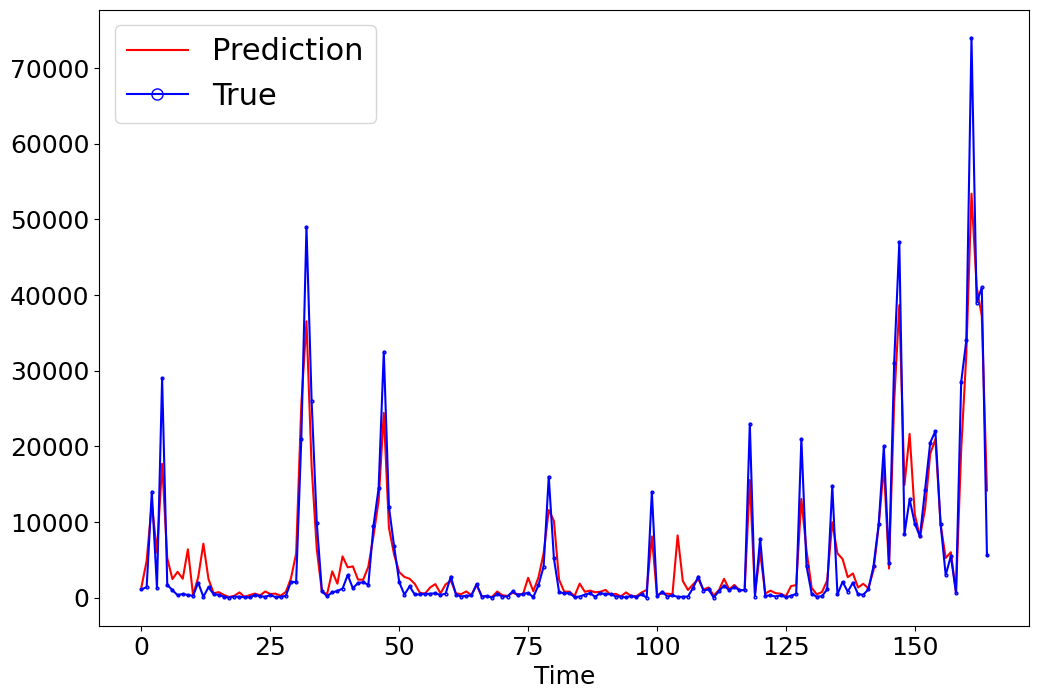

In [41]:
model.predict('training')


********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (52, 7)
target shape:  (52, 1, 1)


D:\mytools\AI4Water\ai4water\post_processing\SeqMetrics\_regression.py:648: RuntimeWarning: divide by zero encountered in true_divide
  return float(np.mean(np.abs((self.true - self.predicted) / self.true)) * 100)
d:\c\anaconda3\envs\tfcpu115_py37\lib\site-packages\scipy\stats\stats.py:410: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


array([36015.4 , 44931.  ,  2093.28,  5821.68, 10614.24, 35176.  ,
       23881.5 , 10530.2 ,  7420.3 ,  5918.55,  6020.98,  9083.9 ,
        1009.02,  1947.66,  5013.62,  5333.24,  2350.32,  3784.27,
        1651.7 ,  2864.22,  2610.8 ,  2828.68,  3678.2 ,  1529.3 ,
        2452.42,  3927.72,  2802.34,  4065.62,  2233.82,  1949.26,
         474.92,   978.9 ,   965.74,  1051.96,   508.88,  6422.84,
       12772.26,  1623.32,   517.  ,  2682.56,  4510.06,   752.46,
       25394.  , 23210.1 , 12456.96,  1672.18,  8791.8 ,   838.1 ,
        3522.76,  6095.36,  1476.98,   678.  ])

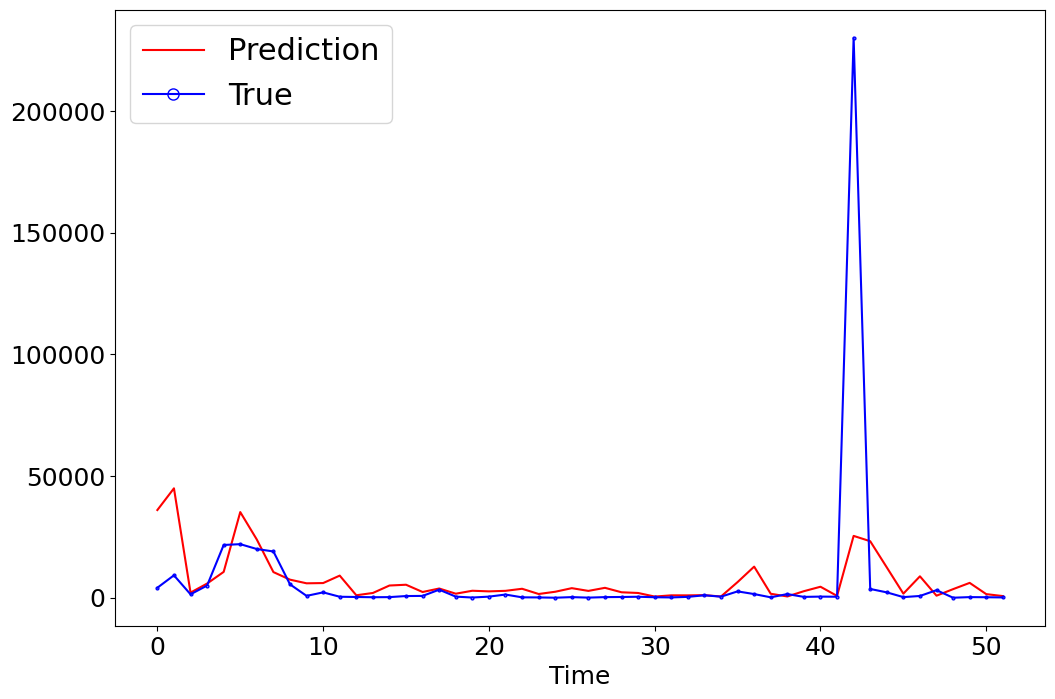

In [40]:
model.predict()